# *Data Cleaning Walkthrough*

**For the purposes of this project, we'll be using data about New York City public schools, which can be found <a href="https://data.cityofnewyork.us/browse?category=Education">here</a>.<br> Below are the datasets that we will be using:**

<a href="https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4">SAT scores by school</a> - SAT scores for each high school in New York City<br>
<a href="https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt">School attendance</a> - Attendance information for each school in New York City<br>
<a href="https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3">Class size</a> - Information on class size for each school<br>
<a href="https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e">AP test results</a> - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)<br>
<a href="https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a">Graduation outcomes</a> - The percentage of students who graduated, and other outcome information<br>
<a href="https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j">Demographics</a> - Demographic information for each school<br>
<a href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8">School survey</a> - Surveys of parents, teachers, and students at each school<br>

**All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.**


### Reading The Data

1. Read each of the files in the list data_files into a pandas dataframe using the pandas.read_csv() function.
    - Recall that all of the data sets are in the schools folder. That means the path to ap_2010.csv is schools/ap_2010.csv.
2. Add each of the dataframes to the dictionary data, using the base of the filename as the key. For example, you'd enter ap_2010 for the file ap_2010.csv.
3. Afterwards, data should have the following keys:
    - ap_2010
    - class_size
    - demographics
    - graduation
    - hs_directory
    - sat_results
4. In addition, each key in data should have the corresponding dataframe as its value.

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for item in data_files:
    data[item[:-4]] = pd.read_csv("schools/%s" % item)
    
for k, v in data.items():
    print(("\nDataFrame: {}").format(k))
    print(v.head(2))


DataFrame: ap_2010
      DBN                    SchoolName AP Test Takers  Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.              39                49   
1  01M450        EAST SIDE COMMUNITY HS              19                21   

  Number of Exams with scores 3 4 or 5  
0                                   10  
1                                    s  

DataFrame: class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   

### Exploring the SAT Data 
1. Display the first five rows of the SAT scores data.
    - Use the key sat_results to access the SAT scores dataframe stored in the dictionary data.
    - Use the pandas.DataFrame.head() method along with the print() function to display the first five rows of the dataframe.

In [2]:
data['sat_results'][:5]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


### Exploring the Remaining Data
1. Loop through each key in data. For each key:
    - Display the first five rows of the dataframe associated with the key.

In [3]:
for item in data:
    print('\n%s\n' % item)
    print(data[item][:5])
    


ap_2010

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K

### Reading in the Survey Data

1. Read in survey_all.txt.
    - Use the pandas.read_csv() function to read survey_all.txt into the variable all_survey. Recall that this file is located in the schools folder.
        - Specify the keyword argument delimiter="\t".
        - Specify the keyword argument encoding="windows-1252".
2. Read in survey_d75.txt.
    - Use the pandas.read_csv() function to read schools/survey_d75.txt into the variable d75_survey. Recall that this file is located in the schools folder.
        - Specify the keyword argument delimiter="\t".
        - Specify the keyword argument encoding="windows-1252".
3. Combine d75_survey and all_survey into a single dataframe.
    - Use the pandas concat() function with the keyword argument axis=0 to combine d75_survey and all_survey into the dataframe survey.
    - Pass in all_survey first, then d75_survey when calling the pandas.concat() function.
4. Display the first five rows of survey using the pandas.DataFrame.head() function.

In [4]:
all_survey = pd.read_csv("schools/survey_all.txt", encoding ='Windows-1252', delimiter='\t')
d75_survey = pd.read_csv("schools/survey_d75.txt", encoding ='Windows-1252', delimiter='\t')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


**Here, we'll need filter the columns to remove the ones we don't need. Luckily, there's a <a href="https://data.cityofnewyork.us/api/views/mnz3-dyi8/files/aa68d821-4dbb-4eb2-9448-3d8cbbad5044?download=true&filename=Survey%20Data%20Dictionary.xls">data dictionary</a> at the original data download <a href="https://data.cityofnewyork.us/Education/2010-2011-NYC-School-Survey/mnz3-dyi8">location</a>. The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.<br><br>Based on the dictionary, it looks like these are the relevant columns:**

***[*** *"dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"* ***]***

### Cleaning up the Surveys


1. Copy the data from the dbn column of survey into a new column in survey called DBN.
2. Filter survey so it only contains the columns we listed above. You can do this using pandas.DataFrame.loc[].
    - Remember that we renamed dbn to DBN; be sure to change the list of columns we want to keep accordingly.
3. Assign the dataframe survey to the key survey in the dictionary data.
4. When you're finished, the value in data["survey"] should be a dataframe with 23 columns and 1702 rows.

In [5]:
survey["DBN"] = survey["dbn"]
survey = survey.loc[:,["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", 
                            "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
                            "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", 
                            "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
                            "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]

data['survey'] = survey
data['survey'].head(2)

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4


### Inserting DBN Fields in class_size dataset

1. Copy the dbn column in hs_directory into a new column called DBN.
2. Create a new column called padded_csd in the class_size data set.
    - Use the pandas.Series.apply() method along with a custom function to generate this column.
        - Make sure to apply the function along the data["class_size"]["CSD"] column.
3. Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size, then assign the result to the DBN column of class_size.
4. Display the first few rows of class_size to double check the DBN column.

In [6]:
# Making new Column with name DBN in hs_directory
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# Making new Column with name padded_csd in class_size
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(lambda x:str(x).zfill(2) 
                                                                   if len(str(x)) < 2 else str(x))

# Making new Column with name DBN in class_size
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']
data['class_size']['DBN']

data['hs_directory'].head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543


In [7]:
data['class_size'].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015


### Combining the SAT Scores

1. Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type.
    - Use the pandas.to_numeric() function on each of the columns, and assign the result back to the same column.
    - Pass in the keyword argument errors="coerce".
2. Create a column called sat_score in sat_results that holds the combined SAT score for each student.
    - Add up SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score, and assign the total to the sat_score column of sat_results.
3. Display the first few rows of the sat_score column of sat_results to verify that everything went okay.

In [8]:
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], 
                                                           errors='coerce')

data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], 
                                                           errors='coerce')

data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], 
                                                           errors='coerce')

data['sat_results']['sat_score'] = (data['sat_results']['SAT Math Avg. Score'] + 
                                    data['sat_results']['SAT Critical Reading Avg. Score'] + 
                                    data['sat_results']['SAT Writing Avg. Score'])

print(data['sat_results'].info())
data['sat_results'].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
sat_score                          421 non-null float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB
None


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0


### Parsing Geographic Co-ordinates for Schools

1. Write a function that:
    - Takes in a string
    - Uses the regular expression above to extract the coordinates
    - Uses string manipulation functions to pull out the latitude
    - Returns the latitude
2. Use the Series.apply() method to apply the function across the Location 1 column of hs_directory. Assign the result to the lat column of hs_directory.
3. Display the first few rows of hs_directory to verify the results.

In [9]:
import re 
def parse(a):
    new_a = re.findall("\(.+\)", a)    
    new_a = new_a[0][1:-1].split(", ")[0]
    return new_a

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(parse)

data['hs_directory'].head(3)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.67029890700047
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.8276026690005
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414068000494


### Extracting the Longitude

1. Write a function that:
    - Takes in a string.
    - Uses the regular expression above to extract the coordinates.
    - Uses string manipulation functions to pull out the longitude.
    - Returns the longitude.
2. Use the Series.apply() method to apply the function across the Location 1 column of hs_directory. Assign the result to the lon column of hs_directory.
3. Use the to_numeric() function to convert the lat and lon columns of hs_directory to numbers.
    - Specify the errors="coerce" keyword argument to handle missing values properly.
4. Display the first few rows of hs_directory to verify the results.

In [10]:
import re 
def parse(a):
    new_a = re.findall("\(.+\)", a)    
    new_a = new_a[0][1:-1].split(", ")[1]
    return new_a

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(parse)
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')

data['hs_directory'].head(3)

# print(parse("1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"))

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414,-73.916162


# *Data Cleaning Walkthrough: Combining the Data*

### Condensing the class_size Dataset

1. Create a new variable called class_size, and assign the value of data["class_size"] to it.
2. Filter class_size so the GRADE column only contains the value 09-12. Note that the name of the GRADE column has a space at the end; you'll generate an error if you don't include it.
3. Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
4. Display the first five rows of class_size to verify.

In [11]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


### Computing Average Class Sizes
1. Find the average values for each column associated with each DBN in class_size.
    - Use the pandas.DataFrame.groupby() method to group class_size by DBN.
    - Use the agg() method on the resulting pandas.core.groupby object, along with the numpy.mean() function as an argument, to calculate the average of each group.
    - Assign the result back to class_size.
2. Reset the index to make DBN a column again.
    - Use the pandas.DataFrame.reset_index() method, along with the keyword argument inplace=True.
3. Assign class_size back to the class_size key of the data dictionary.
4. Display the first few rows of data["class_size"] to verify that everything went okay.

In [12]:
import numpy as np

class_size = class_size.groupby('DBN').agg(np.mean)

class_size.reset_index(inplace=True)

data['class_size'] = class_size

# Grouping the DataFrame using groupby method
# nn = class_size.groupby('DBN')

# Printing the groupby object
# for k,v in nn:
#     print(nn.get_group(k).head(3), "\n\n")
# nn.describe()

class_size.head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


### Condensing the Demographic Dataset

1. Filter demographics, only selecting rows in data["demographics"] where schoolyear is 20112012.
    - schoolyear is actually an integer, so be careful about how you perform your comparison.
2. Display the first few rows of data["demographics"] to verify that the filtering worked.

In [13]:
demographics = data['demographics']
demographics = demographics[demographics['schoolyear']==20112012]

data['demographics'] = demographics
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


### Condensing the Graduation Data Set 
1. Filter graduation, only selecting rows where the Cohort column equals 2006.
2. Filter graduation, only selecting rows where the Demographic column equals Total Cohort.
3. Display the first few rows of data["graduation"] to verify that everything worked properly.

In [14]:
graduation = data['graduation']
graduation = graduation[graduation['Cohort'] == '2006']
graduation = graduation[graduation['Demographic'] == 'Total Cohort']

data['graduation'] = graduation
data['graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.100000000000001
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.400000000000006,95.7,...,67,74.400000000000006,95.7,3,3.3,4.3,15,16.7,5,5.6


### Converting AP Test Scores

1. Convert each of the following columns in ap_2010 to numeric values using the pandas.to_numeric() function with the keyword argument errors="coerce".
    - AP Test Takers
    - Total Exams Taken
    - Number of Exams with scores 3 4 or 5
2. Display the column types using the dtypes attribute.

In [15]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for item in cols:
    data['ap_2010'][item] = pd.to_numeric(data['ap_2010'][item], errors='coerce')
    
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### Performing the Left Joins

1. Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 data set into combined.
    - Make sure to specify how="left" as a keyword argument to indicate the correct join type.
    - Make sure to assign the result of the merge operation back to combined.
2. Use the pandas df.merge() method to merge the graduation data set into combined.
    - Make sure to specify how="left" as a keyword argument to get the correct join type.
    - Make sure to assign the result of the merge operation back to combined.
3. Display the first few rows of combined to verify that the correct operations occurred.
4. Use the pandas.DataFrame.shape attribute to display the shape of the dataframe and see how many rows now exist.

In [16]:
combined = data['sat_results']

combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')
print(combined.shape)
combined.head(3)

(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.100000000000001
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006,95.7,3,3.3,4.3,15,16.7,5,5.6


### Performing the Inner Joins

1. Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
    Be sure to follow the exact order above.
    Remember to specify the correct column to join on, as well as the correct join type.
2. Display the first few rows of combined to verify that the correct operations occurred.
3. Call pandas.DataFrame.shape() to display the shape of the dataframe to see how many rows now exist.

In [17]:
combined = combined.merge(data['class_size'], on='DBN', how='inner')
combined = combined.merge(data['demographics'], on='DBN', how='inner')
combined = combined.merge(data['survey'], on='DBN', how='inner')
combined = combined.merge(data['hs_directory'], on='DBN', how='inner')

print(combined.shape)
combined.head(3)

(363, 165)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041


### Filling in Missing Values

1. Calculate the means of all of the columns in combined using the pandas.DataFrame.mean() method.
2. Fill in any missing values in combined with the means of the respective columns using the pandas.DataFrame.fillna() method.
3. Fill in any remaining missing values in combined with 0 using the df.fillna() method.
4. Display the first few rows of combined to verify that the correct operations occurred.

In [18]:
means = combined.mean()
combined = combined.fillna(means)
combined = combined.fillna(0)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041


### Adding a School District Column for Mapping

1. Write a function that extracts the first two characters of a string and returns them.
2. Apply the function to the DBN column of combined, and assign the result to the school_dist column of combined.
3. Display the first few items in the school_dist column of combined to verify the results.

In [19]:
def first_two(a):
    return a[:2]

combined['school_dist'] = combined['DBN'].apply(first_two)
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

# *Data Cleaning Walkthrough: Analyzing and Visualizing the Data*

### Finding Correlations With the r Value

1. Use the pandas.DataFrame.corr() method on the combined dataframe to find all possible correlations. Assign the result to correlations.
2. Filter correlations so that it only shows correlations for the column sat_score.
3. Display all of the rows in correlations and look them over.

In [24]:
correlations = combined.corr()
print(correlations['sat_score'].to_string())

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

### Plotting Enrollment With the Plot() Accessor

1. Create a scatterplot of total_enrollment versus sat_score.

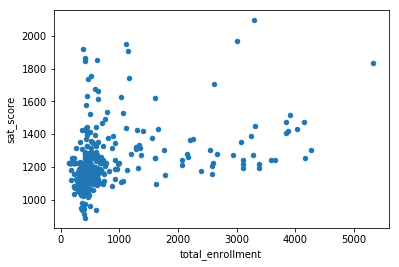

In [27]:
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

### Exploring Schools With Low SAT Scores and Enrollment

1. Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. Assign the result to low_enrollment.
2. Display all of the items in the School Name column of low_enrollment.
3. Use Wikipedia and Google to research the names of the schools. Can you discover anything interesting about them?

In [37]:
low_enrollment = combined[(combined['total_enrollment'] <= 1000) & (combined['sat_score'] <= 1000)]
pd.set_option('display.max_columns', 200)
low_enrollment

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist
91,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34,310.0,324.0,311.0,945.0,0,129.028846,197.038462,153.45,Total Cohort,INTERNATIONAL COMMUNITY HIGH SCHOOL,2006,10.000000,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,7,108.785714,6.642857,16.200000,12.357143,19.500000,0.0,INTERNATIONAL COMMUNITY HIGH SCHOOL,20112012,0,77.5,393,,,,,,,,,,,85,144,110,54,354.0,90.1,7.0,1.8,1,0,19,4.8,79,20.1,282,71.8,8,2.0,191.0,48.6,202.0,51.4,87.0,85,32,308.0,22.0,102.0,8.6,8.2,7.8,8.1,7.8,5.6,7.4,7.5,7.3,6.5,7.0,7.5,7.9,6.8,7.4,7.7,07X334,International Community High School,Bronx,X139,718-665-4128,718-665-4547,9.0,12,0.0,12.0,"Bx1, Bx15, Bx17, Bx19, Bx2, Bx21, Bx32, Bx33, ...","2, 5 to 149th St-3rd Ave ; 6 to Brook Ave",345 Brook Avenue,Bronx,NY,10454,www.ichs.weebly.com,437.0,0,International School,We are a community of English Language Learner...,Students receive support for language developm...,French,0,0,0,"Art, Ballroom Dance, Before- and After-school ...",0,0,0,Small Schools Athletic League: Boys and Girls ...,ASPIRA,Morris Heights Health Clinic,"Hostos Community College, Bard College, CUNY G...","Bronx Arts Ensemble, French Embassy, Learning ...","Internationals Network for Public Schools, Tag...",0,0,0,Internship requirement,Our school requires an Academic Portfolio for ...,9:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Open only to New York City residents living in...,0,0,0,0,0,0,0,0,0,"345 Brook Avenue\nBronx, NY 10454\n(40.8100361...",1.0,8.0,41.0,2000391.0,2.022860e+09,Mott Haven-Port Morris ...,40.810036,-73.917812,07
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,20.00,0,0,0,193.870968,0,0,0,0,0,0,0,0

### Plotting Language Learning Percent
1. Create a scatterplot of ell_percent versus sat_score.

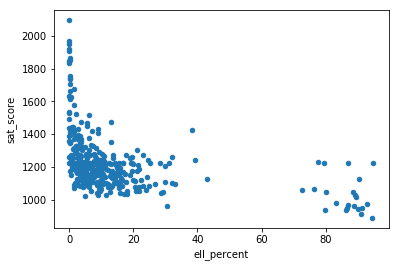

In [47]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

We can set up the map with this code:

*from mpl_toolkits.basemap import Basemap<br>
m = Basemap(<br>
    projection='merc', <br>
    llcrnrlat=40.496044,<br> 
    urcrnrlat=40.915256,<br> 
    llcrnrlon=-74.255735,<br> 
    urcrnrlon=-73.700272,<br>
    resolution='i'<br>
)<br><br>
​
m.drawmapboundary(fill_color='#85A6D9')<br>
m.drawcoastlines(color='#6D5F47', linewidth=.4)<br>
m.drawrivers(color='#6D5F47', linewidth=.4)*

### Mapping the Schools With Basemap
1. Set up the map using the code snippet you saw above -- the one that creates a map, then draws rivers, coastlines, and boundaries.
2. Convert the lon column of combined to a list, and assign it to the longitudes variable.
3. Convert the lat column of combined to a list, and assign it to the latitudes variable.
4. Call the Basemap.scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
5. Show the plot using the pyplot.show() method.

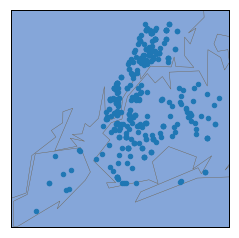

In [48]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

### Plotting out Statistics

1. Set up the map using the code snippet that creates a map, then draws rivers, coastlines, and boundaries.
2. Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value combined["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
3. Show the plot using the show() method.

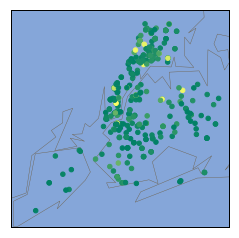

In [49]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined['ell_percent'], cmap='summer')
plt.show()

### Calculating District-level Statistics

1. Find the average values for each column for each school_dist in combined.
    - Use the pandas.DataFrame.groupby() method to group combined by school_dist.
    - Use the agg() method, along with the numpy.mean function as an argument, to calculate the average of each group.
    - Assign the result to the variable districts.
2. Reset the index of districts, making school_dist a column again.
    - Use the pandas.DataFrame.reset_index() method with the keyword argument inplace=True.
3. Display the first few rows of districts to verify that everything went okay.


In [53]:
districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,115.244241,5.148538,22.675415,18.798392,26.553044,0.0,20112012.0,0.0,58.983333,668.500000,42.166667,10.000000,82.000000,17.083333,134.500000,17.516667,125.500000,22.333333,214.833333,40.733333,186.000000,18.450000,328.166667,50.050000,340.333333,49.950000,76.500000,85.333333,33.166667,525.368056,38.500000,239.166667,8.233333,7.800000,7.683333,8.016667,7.066667,6.233333,6.700000,7.500000,6.768611,6.165787,6.736713,7.446898,7.433333,6.816667,7.116667,7.683333,7.910896,12.0,0.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,149.818949,5.686360,25.038118,20.662667,28.593861,0.0,20112012.0,0.0,63.164583,605.604167,51.625000,13.006250,70.770833,13.212500,118.395833,14.479167,141.145833,24.733333,271.458333,49.554167,68.541667,10.056250,266.500000,44.718750,339.104167,55.281250,83.312500,86.416667,38.333333,495.171007,31.687500,190.000000,8.254167,7.495833,7.379167,7.704167,7.404167,6.520833,7.120833,7.564583,6.910660,6.204057,6.650422,7.385029,7.520833,6.720833,7.037500,7.541667,8.875000,12.0,0.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,156.005994,5.839200,23.716311,19.737593,27.122831,0.0,20112012.0,0.0,58.050000,661.416667,36.916667,9.025000,63.583333,14.500000,68.000000,6.408333,181.833333,34.000000,228.250000,44.533333,172.000000,13.725000,272.166667,47.950000,389.250000,52.050000,83.166667,80.833333,36.166667,519.250000,28.166667,206.416667,8.316667,7.541667,7.508333,7.758333,6.675000,5.991667,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667,8.500000,12.0,0.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,132.362265,5.192610,24.101048,19.740816,27.460291,0.0,20112012.0,0.0,71.000000,569.285714,21.571429,4.557143,58.571429,13.214286,61.142857,6.128571,151.714286,30.028571,341.571429,61.400000,9.285714,1.314286,193.285714,30.514286,376.000000,69.485714,87.571429,92.714286,41.285714,504.857143,32.428571,193.142857,8.385714,7.657143,7.500000,7.928571,7.871429,7.042857,7.428571,7.885714,6.885714,6.114286,6.685714,7.571429,7.714286,6.942857,7.185714,7.785714,8.142857,12.0,0.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,120.623901,4.845101,24.290247,20.447527,27.746703,0.0,20112012.0,0.0,58.671429,605.857143,21.571429,4.157143,59.714286,10.428571,32.714286,7.300000,342.571429,49.

### Plotting Percent of English Leaners by District 

1. Use the code snippet from before that creates a map, then draws rivers, coastlines, and boundaries.
2. Convert the lon column of districts to a list, and assign it to the longitudes variable.
3. Convert the lat column of districts to a list, and assign it to the latitudes variable.
4. Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=50 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value districts["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
5. Show the plot using the show() method. 

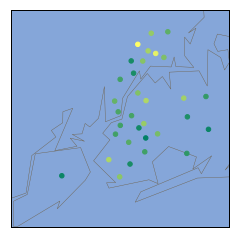

In [54]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=districts['ell_percent'], cmap='summer')
plt.show()